Importing all the important modules of python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import itertools
from skimage import io, data, filters
import skimage

In [ ]:
#Path Process
import os
import os.path
from pathlib import Path
import glob

In [ ]:
#Image Process
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image

In [ ]:
#Scaler & Transformation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Accuracy Control
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

In [ ]:
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model

In [ ]:
pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [ ]:
#SKLEARN CLASSIFIER
from xgboost.sklearn import XGBClassifier, XGBRegressor
from lightgbm.sklearn import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [ ]:
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

Loading the Image dataset

In [ ]:
Main_PNG_Path = Path("/content/drive/MyDrive/data111")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PNG_Path = list(Main_PNG_Path.glob(r"*/*.png"))

In [ ]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

In [ ]:
#To Series
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

In [ ]:
#To DataFrame
Main_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [ ]:
Main_Data.head(-1)

,PNG,CATEGORY
0,/content/drive/MyDrive/data111/non-vehicles/im...,non-vehicles
1,/content/drive/MyDrive/data111/non-vehicles/im...,non-vehicles
2,/content/drive/MyDrive/data111/non-vehicles/im...,non-vehicles
3,/content/drive/MyDrive/data111/non-vehicles/im...,non-vehicles
4,/content/drive/MyDrive/data111/non-vehicles/im...,non-vehicles
...,...,...
17751,/content/drive/MyDrive/data111/vehicles/1711.png,vehicles
17752,/content/drive/MyDrive/data111/vehicles/1702.png,vehicles
17753,/content/drive/MyDrive/data111/vehicles/1699.png,vehicles
17754,/content/drive/MyDrive/data111/vehicles/1713.png,vehicles


In [ ]:
#REPLACING VALUE NAME
Main_Data['CATEGORY'] = Main_Data['CATEGORY'].replace('non-vehicles','no_vehicles')

In [ ]:
Main_Data.head(-1)

,PNG,CATEGORY
0,/content/drive/MyDrive/data111/non-vehicles/im...,no_vehicles
1,/content/drive/MyDrive/data111/non-vehicles/im...,no_vehicles
2,/content/drive/MyDrive/data111/non-vehicles/im...,no_vehicles
3,/content/drive/MyDrive/data111/non-vehicles/im...,no_vehicles
4,/content/drive/MyDrive/data111/non-vehicles/im...,no_vehicles
...,...,...
17751,/content/drive/MyDrive/data111/vehicles/1711.png,vehicles
17752,/content/drive/MyDrive/data111/vehicles/1702.png,vehicles
17753,/content/drive/MyDrive/data111/vehicles/1699.png,vehicles
17754,/content/drive/MyDrive/data111/vehicles/1713.png,vehicles


In [ ]:
#Shuffling performed to the dataset
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

In [ ]:
Main_Data.head(-1)        #Shuffling done.

,PNG,CATEGORY
0,/content/drive/MyDrive/data111/non-vehicles/ex...,no_vehicles
1,/content/drive/MyDrive/data111/non-vehicles/ex...,no_vehicles
2,/content/drive/MyDrive/data111/vehicles/5289.png,vehicles
3,/content/drive/MyDrive/data111/vehicles/1782.png,vehicles
4,/content/drive/MyDrive/data111/vehicles/1294.png,vehicles
...,...,...
17751,/content/drive/MyDrive/data111/vehicles/1282.png,vehicles
17752,/content/drive/MyDrive/data111/non-vehicles/ex...,no_vehicles
17753,/content/drive/MyDrive/data111/non-vehicles/ex...,no_vehicles
17754,/content/drive/MyDrive/data111/non-vehicles/ex...,no_vehicles


### Visualization

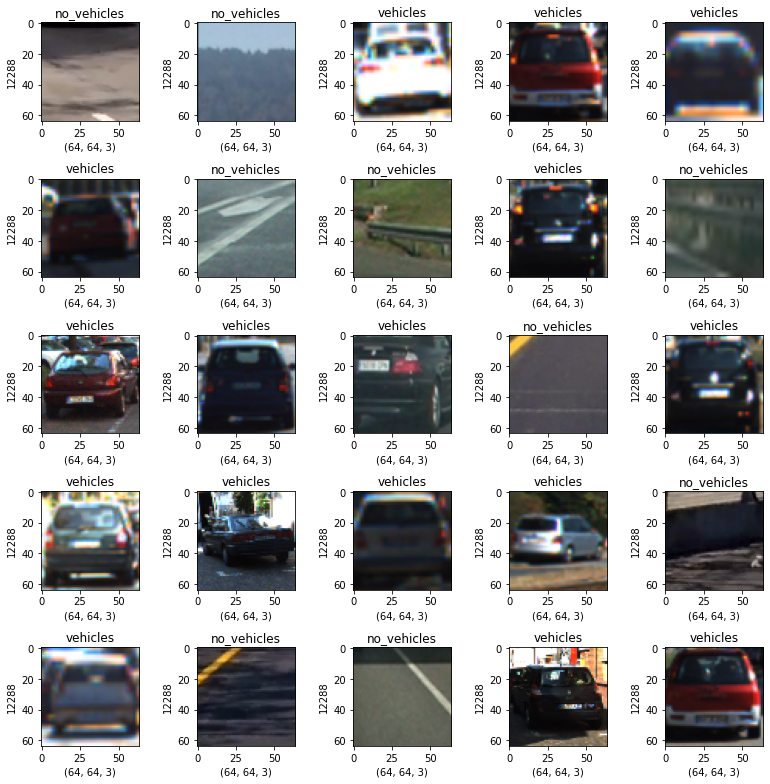

In [ ]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = Main_Data["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(Main_Data["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

In [ ]:
non_veh_img = Main_Data[Main_Data.CATEGORY == 'no_vehicles']
veh_img = Main_Data[Main_Data.CATEGORY == 'vehicles']

non_veh_img = non_veh_img.reset_index()
veh_img = veh_img.reset_index()

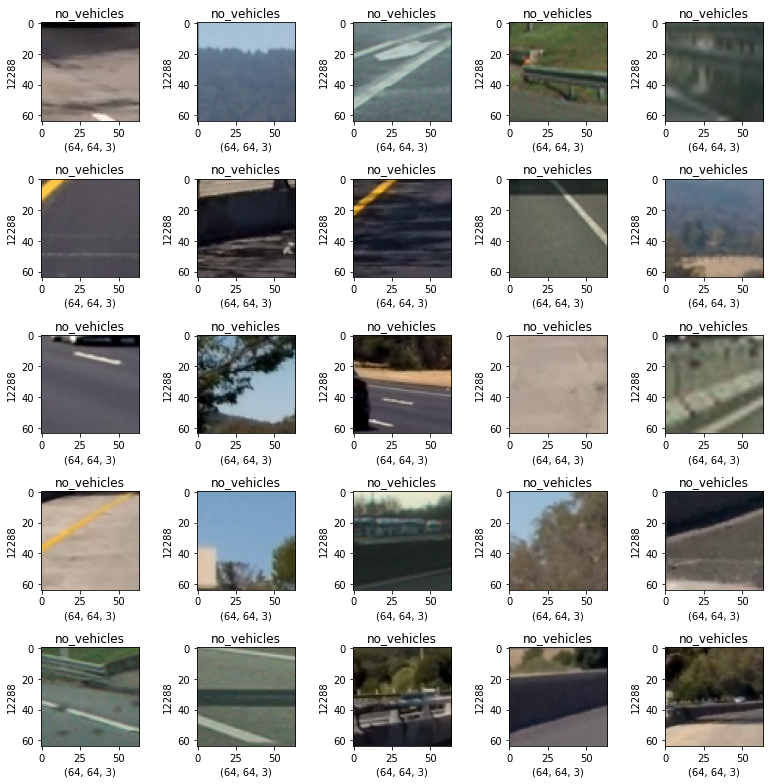

In [ ]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = non_veh_img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(non_veh_img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

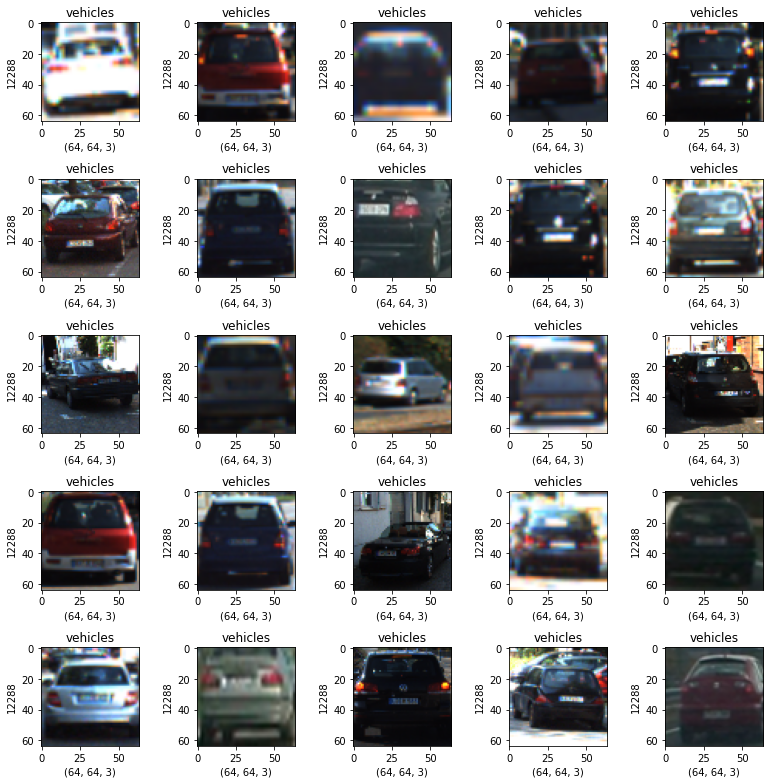

In [ ]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = veh_img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(veh_img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

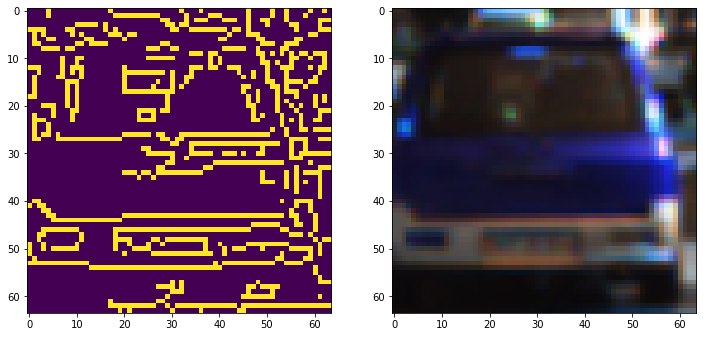

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(veh_img["PNG"][1])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

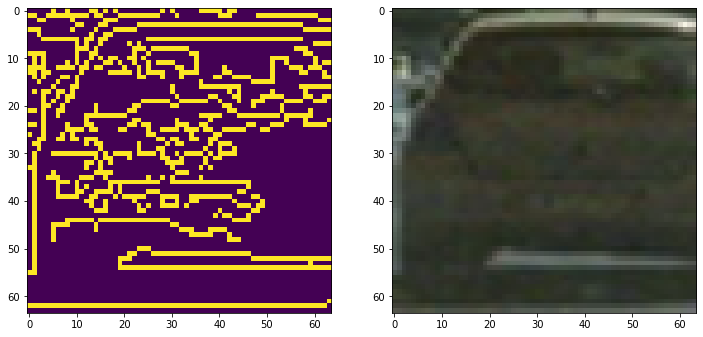

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(veh_img["PNG"][100])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

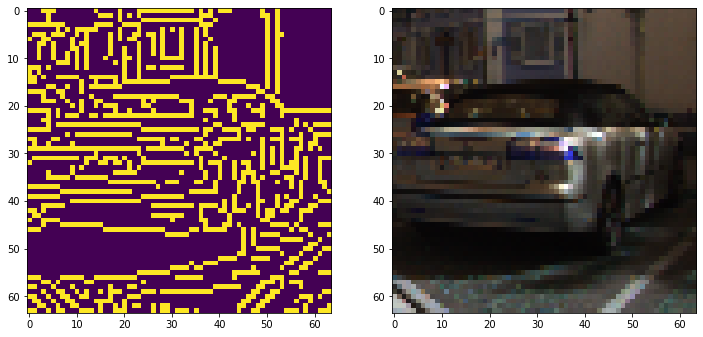

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(veh_img["PNG"][155])
C_IMG = cv2.Canny(E_IMG,10,85)

axis[0].imshow(C_IMG)
axis[1].imshow(E_IMG)

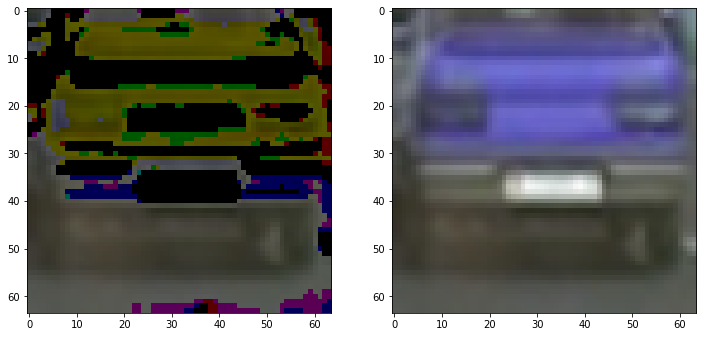

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

E_IMG = cv2.imread(veh_img["PNG"][47])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)


axis[0].imshow(Threshold_I)
axis[1].imshow(E_IMG)

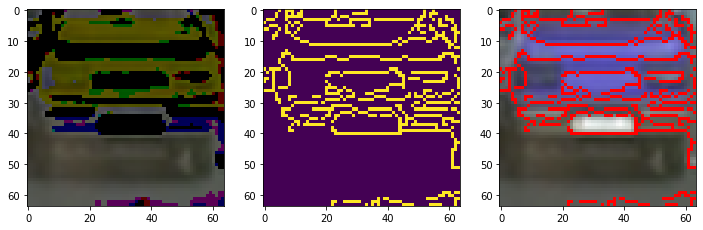

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

E_IMG = cv2.imread(veh_img["PNG"][47])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(Threshold_I,90,450)
contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Draw_Img = cv2.drawContours(E_IMG,contours,-1,(255,0,0),1)


axis[0].imshow(Threshold_I)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

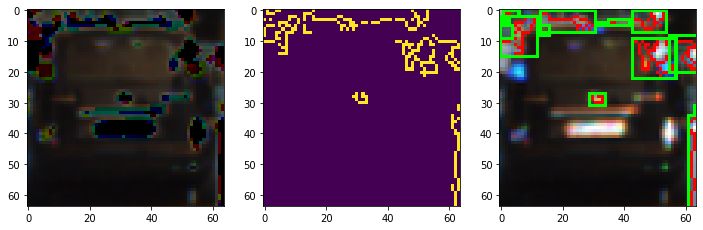

In [ ]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

E_IMG = cv2.imread(veh_img["PNG"][4])
_,Threshold_I = cv2.threshold(E_IMG,90,255,cv2.THRESH_TOZERO_INV)
C_IMG = cv2.Canny(Threshold_I,90,450)
contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Draw_Img = cv2.drawContours(E_IMG,contours,-1,(255,0,0),1)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(Draw_Img,(x,y),(x+w,y+h),(0,255,0),1)

axis[0].imshow(Threshold_I)
axis[1].imshow(C_IMG)
axis[2].imshow(E_IMG)

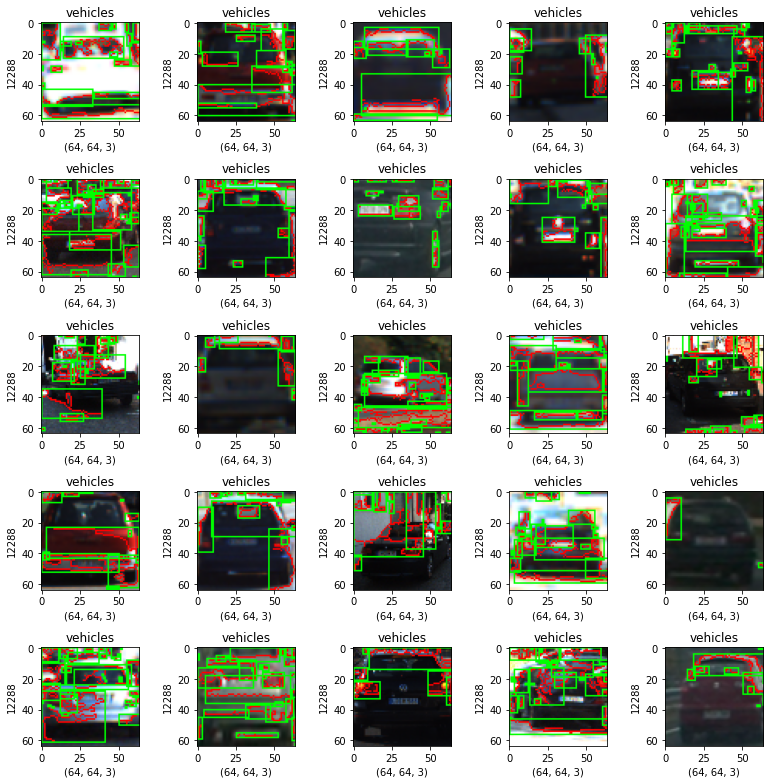

In [ ]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(11,11))

for In_Image,sub in enumerate(axis.flat):
    Im_Exp = veh_img["PNG"][In_Image]
    Exp_Im = cv2.imread(Im_Exp)
    Exp_Im = cv2.cvtColor(Exp_Im,cv2.COLOR_BGR2RGB)
    _,Thre_Img = cv2.threshold(Exp_Im,100,255,cv2.THRESH_TOZERO_INV)
    C_IMG = cv2.Canny(Thre_Img,90,450)
    contours,_ = cv2.findContours(C_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    Draw_Img = cv2.drawContours(Exp_Im,contours,-1,(255,0,0),1)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(Draw_Img,(x,y),(x+w,y+h),(0,255,0),1)
        
    sub.set_xlabel(Exp_Im.shape)
    sub.set_ylabel(Exp_Im.size)
    sub.set_title(veh_img["CATEGORY"][In_Image])
    sub.imshow(Exp_Im)
plt.tight_layout()
plt.show()

## Image Generator Process
#### Generator Structure

In [ ]:
Train_IMG_Generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=25,
                                        shear_range=0.2,
                                        zoom_range=0.1,
                                        brightness_range=[0.2,0.8],
                                        horizontal_flip=True,
                                        validation_split=0.1)

In [ ]:
Test_Image_Generator = ImageDataGenerator(rescale=1./255)

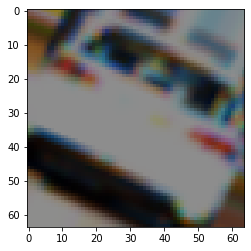

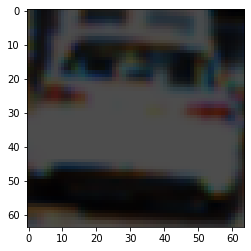

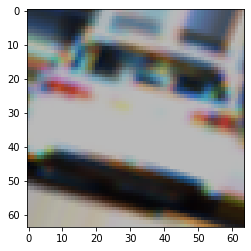

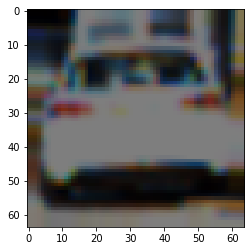

In [ ]:
##How to look by Generator
Example_Image = Main_Data["PNG"][2]
Load_Image = image.load_img(Example_Image,target_size=(64,64))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,)+Array_Image.shape)

i = 0

for batch in Train_IMG_Generator.flow(Array_Image,batch_size=32):
    plt.figure(i)
    Image = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
#Applying
Train_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=Main_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                    target_size=(64,64),
                                                   class_mode="binary",
                                                   subset="training")

Found 15982 validated image filenames belonging to 2 classes.


In [ ]:
Validaiton_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=Main_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                    target_size=(64,64),
                                                   class_mode="binary",
                                                   subset="validation")

Found 1775 validated image filenames belonging to 2 classes.


In [ ]:
Test_Set = Test_Image_Generator.flow_from_dataframe(dataframe=Main_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                    target_size=(64,64),
                                                   class_mode="binary",
                                                   shuffle=False)

Found 17757 validated image filenames belonging to 2 classes.


In [ ]:
print("TRAIN: ")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validaiton_Set.class_indices)
print(Validaiton_Set.classes[0:5])
print(Validaiton_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN: 
{'no_vehicles': 0, 'vehicles': 1}
[1, 0, 1, 1, 0]
(64, 64, 3)
------------------------------------------------------------
VALIDATION: 
{'no_vehicles': 0, 'vehicles': 1}
[0, 0, 1, 1, 1]
(64, 64, 3)
------------------------------------------------------------
TEST: 
{'no_vehicles': 0, 'vehicles': 1}
[0, 0, 1, 1, 1]
(64, 64, 3)


## MODEL
#### Structure

In [ ]:
Model = Sequential()

Model.add(SeparableConv2D(12,(3,3),activation="relu",input_shape=(64,64,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(SeparableConv2D(24,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))

#
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(32,return_sequences=True,dropout=0.5,recurrent_dropout=0.5)))
Model.add(Bidirectional(GRU(32,return_sequences=True, dropout=0.5,recurrent_dropout=0.5)))

#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="sigmoid"))

In [ ]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 62, 62, 12)        75        
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 12)        48        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 12)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 31, 31, 24)        420       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 24)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 24)        0         
_________________________________________________________________
time_distributed (TimeDistri (None, 15, 360)           0

In [ ]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [ ]:
Model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validaiton_Set,
                      callbacks=Call_Back,
                      epochs=50)

500/500 [==============================] - 4766s 10s/step - loss: 0.3528 - accuracy: 0.8310 - val_loss: 0.7230 - val_accuracy: 0.7256
Epoch 2/50
500/500 [==============================] - 141s 282ms/step - loss: 0.1266 - accuracy: 0.9525 - val_loss: 0.0973 - val_accuracy: 0.9690
Epoch 3/50
500/500 [==============================] - 142s 283ms/step - loss: 0.0890 - accuracy: 0.9672 - val_loss: 0.0641 - val_accuracy: 0.9780
Epoch 4/50
500/500 [==============================] - 142s 283ms/step - loss: 0.0691 - accuracy: 0.9735 - val_loss: 0.0628 - val_accuracy: 0.9797
Epoch 5/50
500/500 [==============================] - 142s 283ms/step - loss: 0.0722 - accuracy: 0.9754 - val_loss: 0.0783 - val_accuracy: 0.9730
Epoch 6/50
500/500 [==============================] - 138s 277ms/step - loss: 0.0550 - accuracy: 0.9808 - val_loss: 0.0386 - val_accuracy: 0.9842
Epoch 7/50
500/500 [==============================] - 137s 273ms/step - loss: 0.0598 - accuracy: 0.9789 - val_loss: 0.0373 - val_accurac

In [ ]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

555/555 [==============================] - 42s 76ms/step - loss: 0.0234 - accuracy: 0.9928
LOSS:  0.0234
ACCURACY:  0.99


In [ ]:
Model.save("./Last_Model")

INFO:tensorflow:Assets written to: ./Last_Model/assets


In [ ]:
Model.save("Prediction_Model.h5")

In [ ]:
Model.save_weights("Model_Weights.h5")

CONTROL

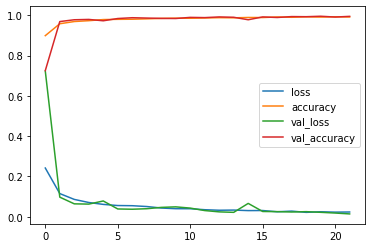

In [ ]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

No handles with labels found to put in legend.


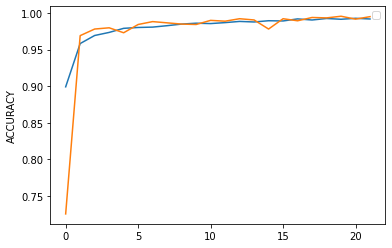

In [ ]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No handles with labels found to put in legend.


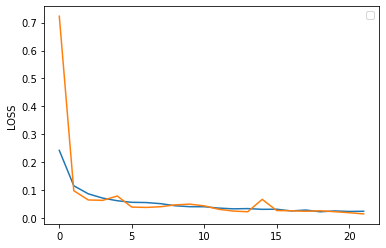

In [ ]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

PREDICTION

In [ ]:
Test_Prediction = Model.predict(Test_Set)
Test_Prediction_Class = Model.predict_classes(Test_Set)

In [ ]:
print(Test_Prediction)

[[3.5387891e-11]
 [2.1426638e-13]
 [1.0000000e+00]
 ...
 [9.2989047e-15]
 [9.9949384e-01]
 [3.4237095e-07]]


In [ ]:
Test_Prediction = Test_Prediction.argmax(axis=-1)

In [ ]:
print(Test_Prediction)

[0 0 0 ... 0 0 0]


In [ ]:
print(Test_Prediction_Class)

[[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [0]]


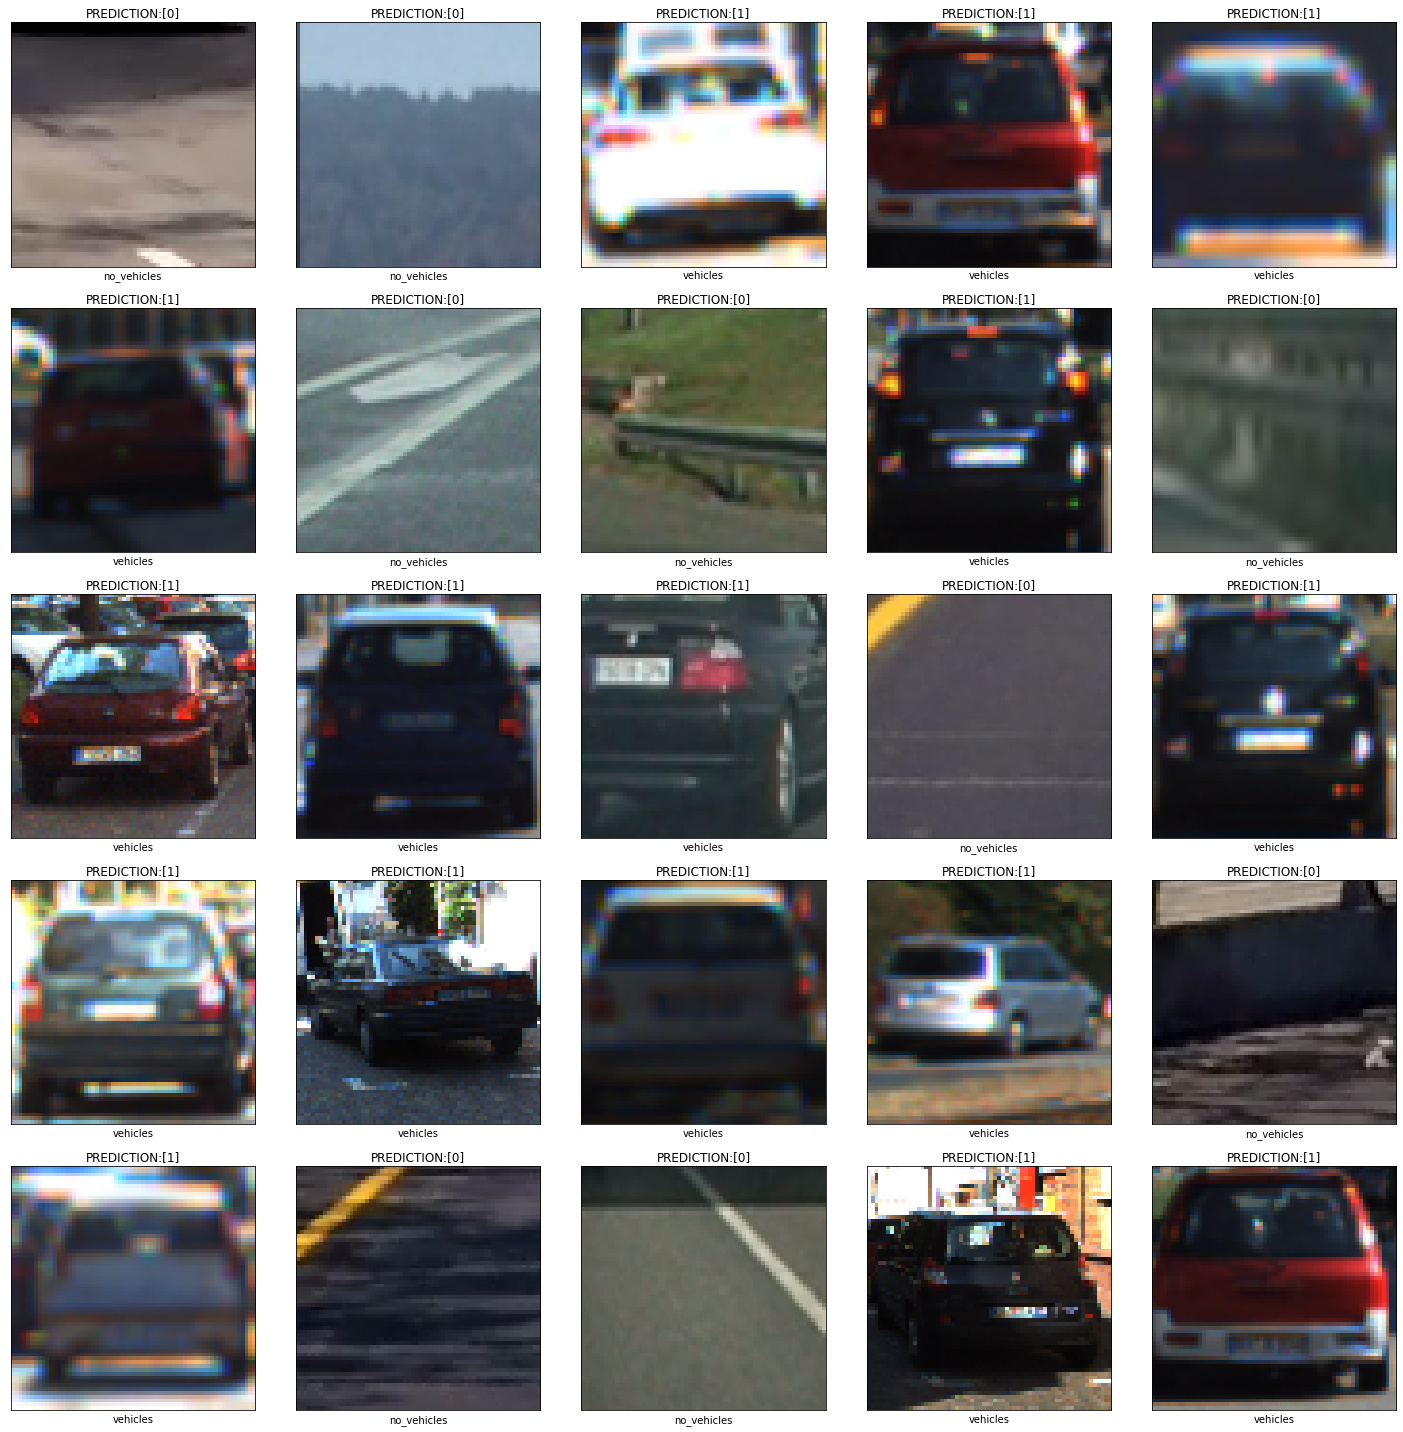

In [ ]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["PNG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Test_Prediction_Class[i]}")
    ax.set_xlabel(Main_Data["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()

Special Prediction

In [ ]:
v_img = "/content/drive/MyDrive/data111/vehicles/1.png"

In [ ]:
non_v = "/content/drive/MyDrive/data111/non-vehicles/extra1039.png"

In [ ]:
def searching_vehicle(img):
    Main_Img = cv2.imread(img)
    Array_Cr = np.asarray(Main_Img)
    Array_Cr = Array_Cr.reshape(1,Array_Cr.shape[0],Array_Cr.shape[1],Array_Cr.shape[2])
    heating = Model.predict_classes(Array_Cr)
    
    if heating[0][0] == 1:
        
        canny_Im = cv2.Canny(Main_Img,90,450)
        contours,_ = cv2.findContours(canny_Im,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        Draw_Img = cv2.drawContours(Main_Img,contours,-1,(255,0,0),1)
        plt.imshow(Draw_Img)
        
    elif heating[0][0] == 0:
        print("NO VEHICLE")

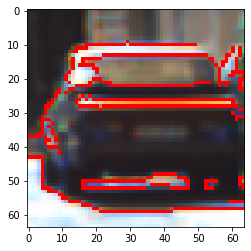

In [ ]:
searching_vehicle(v_img)

In [ ]:
searching_vehicle(non_v)

NO VEHICLE
